In [3]:
# Uploading Dependencies
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# Using fastai module for runnign deep learning 
from fastai import *
from fastai.vision import *

In [5]:
#importing the pizza images and assigning test and train 
import os
print(os.listdir("./pizzadataset"))


['.DS_Store', 'test', 'train']


In [6]:
#assigning path to data"
path = Path('./pizzadataset')
path

PosixPath('pizzadataset')

In [7]:
#transforming images and splitting the test and train to 0.2--> 20% test
data = ImageDataBunch.from_folder(path, train = ".", valid_pct=0.2, ds_tfms=get_transforms(), size=299, bs=32, num_workers=0).normalize(imagenet_stats)

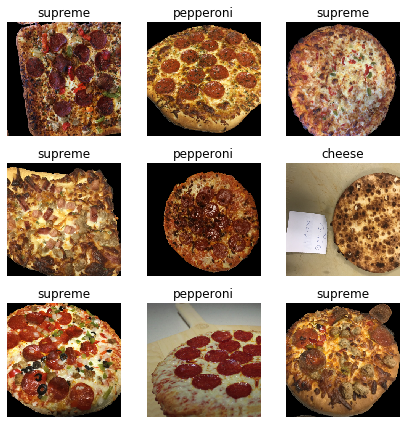

In [8]:
#Displaying transformed images
data.show_batch(rows=3, figsize=(6,6))

In [9]:
data

ImageDataBunch;

Train: LabelList (112 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
cheese,cheese,cheese,cheese,cheese
Path: pizzadataset;

Valid: LabelList (28 items)
x: ImageList
Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299),Image (3, 299, 299)
y: CategoryList
pepperoni,cheese,supreme,pepperoni,supreme
Path: pizzadataset;

Test: None

In [10]:
data.classes

['cheese', 'pepperoni', 'supreme']

In [14]:
learn = create_cnn(data, models.resnet34, metrics = [error_rate, accuracy])

In [15]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.542787,2.224571,0.607143,0.392857,02:11
1,1.202142,1.180889,0.285714,0.714286,02:11
2,1.036086,0.345959,0.107143,0.892857,02:30
3,0.863367,0.300653,0.142857,0.857143,02:31


In [19]:
learn.save("stage-topping")

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


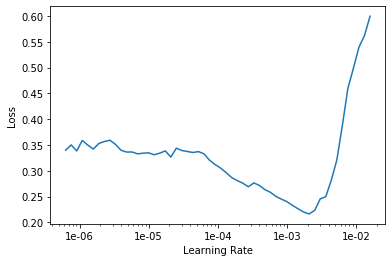

In [20]:
#Initiating refit and checking LR
learn.load("stage-topping")
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

In [21]:
#The lowest loss is at 1e-04 and loss increases from after 1e-03. Refitting by modulating LR
learn.fit_one_cycle(2,max_lr=slice(1e-05,1e-03))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.233498,0.326477,0.142857,0.857143,02:11
1,0.384972,0.268998,0.035714,0.964286,02:10


In [22]:
#Saving the model with accuracy %
learn.save('stage-topping-1')

In [23]:
learn.export("stage_topping.pkl")

In [24]:
#Uploaded a separate dataset for testing each of the above classes.
PRED_PATH = "./testimages"
img_91 = open_image(f'{PRED_PATH}/91.jpg')
img_92 = open_image(f'{PRED_PATH}/92.jpg')
img_117 = open_image(f'{PRED_PATH}/117.jpg')
img_118 = open_image(f'{PRED_PATH}/118.jpg')

In [25]:
learn.load('stage-topping-1')
pred_class = learn.predict(img_92)
pred_class

(Category tensor(1), tensor(1), tensor([2.4477e-03, 9.9755e-01, 2.7709e-06]))

In [26]:
learn.load('stage-topping-1')
pred_class = learn.predict(img_117)
pred_class

(Category tensor(2), tensor(2), tensor([1.9888e-06, 2.8219e-06, 1.0000e+00]))

In [27]:
learn.load('stage-topping-1')
pred_class = learn.predict(img_118)
pred_class

(Category tensor(2), tensor(2), tensor([4.1732e-05, 5.2706e-05, 9.9991e-01]))

In [28]:
learn.load('stage-topping-1')
pred_class = learn.predict(img_91)
pred_class

(Category tensor(1), tensor(1), tensor([0.0112, 0.7675, 0.2214]))

In [29]:
pepperoni = open_image(f'{PRED_PATH}/Pepperoni.jpg')

In [30]:
learn.load('stage-topping-1')
pred_class = learn.predict(pepperoni)
pred_class

(Category tensor(1), tensor(1), tensor([1.5295e-04, 9.7725e-01, 2.2598e-02]))

In [31]:
salad = open_image(f'{PRED_PATH}/salad.jpg')

In [32]:
learn.load('stage-topping-1')
pred_class = learn.predict(salad)
pred_class

(Category tensor(1), tensor(1), tensor([0.1212, 0.4860, 0.3928]))

In [45]:
print(pred_class)

(Category tensor(1), tensor(1), tensor([0.1212, 0.4860, 0.3928]))


In [46]:
learn.data.classes

['cheese', 'pepperoni', 'supreme']

In [47]:
toppings_model = load_learner(Path("model"), 'stage_topping.pkl')


#learn = load_learner(Path(ROOT_PATH), 'fastai-retinanet.pkl')

In [48]:
new_image = open_image(f'{PRED_PATH}/plate.jpg')

prediction = toppings_model.predict(new_image)
prediction

(Category tensor(1), tensor(1), tensor([0.2331, 0.7304, 0.0365]))

In [49]:
prediction[1]


tensor(1)

In [50]:
toppings_list = ['cheese', 'pepperoni', 'supreme']

In [51]:
toppings_list[prediction[1]]

'pepperoni'